In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data_transactions = {
    'transaction_id': [1, 2, 3, 4, 5, 6, 7, 8],
    'client_id': [101, 102, 101, 103, 102, 101, 103, 102],
    'transaction_date': ['2024-01-15', '2024-02-20', '2024-03-10', '2024-04-05', '2024-05-12', '2023-12-25', '2024-06-01', '2024-07-18'],
    'amount': ['1000.50', '200.75', '150.00', '500.25', '300.50', '1200.00', '700.00', '400.00'],
    'currency': ['USD', 'EUR', 'USD', 'USD', 'EUR', 'USD', 'USD', 'EUR'],
    'transaction_type': ['deposit', 'withdrawal', 'deposit', 'withdrawal', 'deposit', 'deposit', 'withdrawal', 'withdrawal']
}

In [3]:
data_clients = {
    'client_id': [101, 102, 103],
    'client_name': ['Иван Иванов', 'Петр Петров', 'Сидор Сидоров'],
    'registration_date': ['2023-12-01', '2024-01-10', '2024-02-15'],
    'client_status': ['active', 'active', 'inactive']
}

In [4]:
transactions = pd.DataFrame(data_transactions)
clients = pd.DataFrame(data_clients)

In [5]:
transactions

transaction_id  client_id transaction_date   amount currency  \
0               1        101       2024-01-15  1000.50      USD   
1               2        102       2024-02-20   200.75      EUR   
2               3        101       2024-03-10   150.00      USD   
3               4        103       2024-04-05   500.25      USD   
4               5        102       2024-05-12   300.50      EUR   
5               6        101       2023-12-25  1200.00      USD   
6               7        103       2024-06-01   700.00      USD   
7               8        102       2024-07-18   400.00      EUR   

  transaction_type  
0          deposit  
1       withdrawal  
2          deposit  
3       withdrawal  
4          deposit  
5          deposit  
6       withdrawal  
7       withdrawal

In [6]:
clients

client_id    client_name registration_date client_status
0        101    Иван Иванов        2023-12-01        active
1        102    Петр Петров        2024-01-10        active
2        103  Сидор Сидоров        2024-02-15      inactive

# Задание 1



На основе предоставленных данных необходимо получить итоговый отчет, который содержит следующую информацию для каждого активного клиента за 2024 год:
* Общую сумму транзакций по типам операций.
* Среднюю сумму транзакций по типам операций.
* Количество транзакций по типам операций.
* Дату последней транзакции.
 


**DataFrame с агрегированными данными по активным клиентам за 2024 год, отсортированный по убыванию общей суммы транзакций.**

## Преобразование типов данных

### transactions

In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    8 non-null      int64 
 1   client_id         8 non-null      int64 
 2   transaction_date  8 non-null      object
 3   amount            8 non-null      object
 4   currency          8 non-null      object
 5   transaction_type  8 non-null      object
dtypes: int64(2), object(4)
memory usage: 516.0+ bytes


In [11]:
transactions['amount'] = transactions['amount'].astype('float')
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

### clients

In [13]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   client_id          3 non-null      int64 
 1   client_name        3 non-null      object
 2   registration_date  3 non-null      object
 3   client_status      3 non-null      object
dtypes: int64(1), object(3)
memory usage: 228.0+ bytes


In [14]:
clients['registration_date'] = pd.to_datetime(clients['registration_date'])

## Объединение двух DataFrame

In [16]:
merge_df = pd.merge(transactions, clients, on='client_id', how='left')

## Оставляем активных клиентов и с транзакциями за 2024 год

In [18]:
merge_df = merge_df[(merge_df['client_status'] == 'active') & (merge_df['transaction_date'].dt.year == 2024)]

In [19]:
merge_df

transaction_id  client_id transaction_date   amount currency  \
0               1        101       2024-01-15  1000.50      USD   
1               2        102       2024-02-20   200.75      EUR   
2               3        101       2024-03-10   150.00      USD   
4               5        102       2024-05-12   300.50      EUR   
7               8        102       2024-07-18   400.00      EUR   

  transaction_type  client_name registration_date client_status  
0          deposit  Иван Иванов        2023-12-01        active  
1       withdrawal  Петр Петров        2024-01-10        active  
2          deposit  Иван Иванов        2023-12-01        active  
4          deposit  Петр Петров        2024-01-10        active  
7       withdrawal  Петр Петров        2024-01-10        active

## Считаем итоговую сумму, среднее и количество выполненных транзакций по типу операций

In [21]:
sm = merge_df.groupby('transaction_type')['amount'].sum().reset_index()

In [22]:
average = round(merge_df.groupby('transaction_type')['amount'].mean(), 2).reset_index()

In [23]:
cnt = merge_df.groupby('transaction_type')['transaction_id'].count().reset_index()

### Объединяем в одну таблицу

In [25]:
table = pd.merge(
    pd.merge(sm, cnt, on='transaction_type', how='inner'), 
    average, on='transaction_type', how='inner'
)

### Задаем название столбцов

In [27]:
table.columns = ['transaction_type', 'amount_sum', 'transaction_count', 'average']

In [28]:
# вывод полученного датафрейма
table['last_date_of_transaction'] = max(merge_df['transaction_date'])

In [29]:
table

transaction_type  amount_sum  transaction_count  average  \
0          deposit     1451.00                  3   483.67   
1       withdrawal      600.75                  2   300.38   

  last_date_of_transaction  
0               2024-07-18  
1               2024-07-18

## Визуализируем полученные результаты

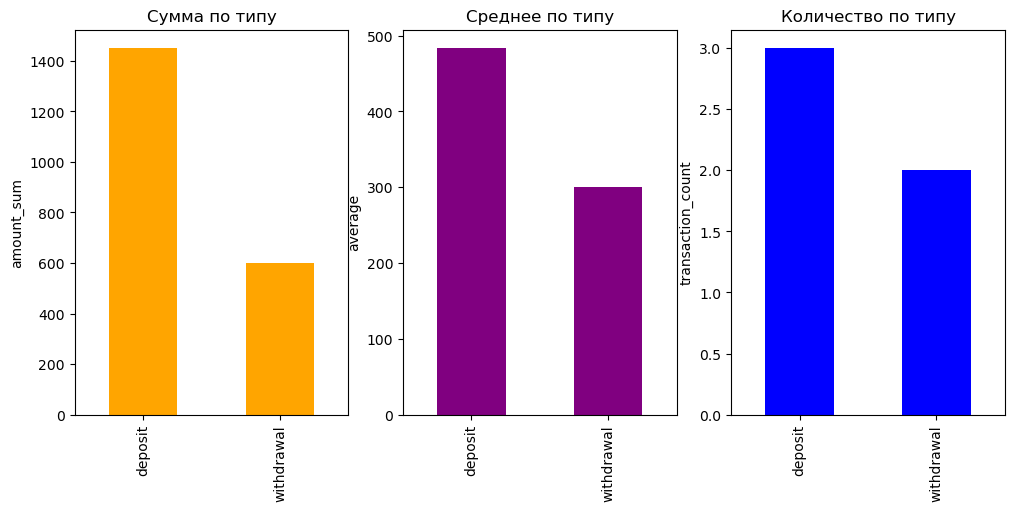

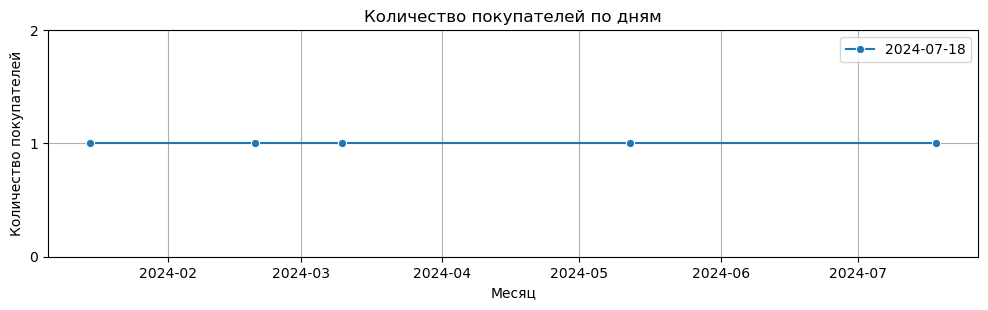

In [31]:
lst = ['amount_sum', 'average', 'transaction_count']
name = ['Сумма по типу', 'Среднее по типу', 'Количество по типу']
color = ['orange', 'purple', 'blue']

fig, ax = plt.subplots(1, 3, figsize=(12,5))

for i, v in enumerate(lst):
    ax[i].set_title(f'{name[i]}')
    
    table.plot.bar(
    x='transaction_type',
    y=f'{v}',
    legend=False,
    ax=ax[i],
    color=color[i]
    )
    ax[i].set_xlabel('', rotation=0)
    ax[i].set_ylabel(f'{lst[i]}')

plt.show()



plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 3)

plt.title('Количество покупателей по дням')

sns.lineplot(
    merge_df.groupby(merge_df['transaction_date'])['client_id'].count().reset_index(), 
    x='transaction_date', 
    y='client_id', 
    marker='o', 
    label=table['last_date_of_transaction'].dt.date.unique()
)

plt.xlabel('Месяц')
plt.ylabel('Количество покупателей')
plt.yticks(np.arange(0, max(merge_df.groupby(merge_df['transaction_date'])['client_id'].count().reset_index()['client_id']) + 2, 1))
plt.legend()
plt.grid()
plt.show()


# Отчет из полученных данных
### **Процент вложенных средств**, клиентами в 2024 году и которые в настоящий момент являются пользователями финансового учреждения, **достигает 70%**, тогда как **снятие наличных достигает 30%**, данные представлены на графике 1 "*Сумма по типу*".

### Клиенты вкладывают в финансовое учреждение в среднем по 480 условных единиц (далее - у.е.) и снимают по 300 у.е., данные представлены на графике 2 "*Среднее по типу*", оставляя у.е. для дальнейшего пользования текущим финансовым учреждением. На графике 3 представлено количество выполненных операций пользователями, 60% пользователей предпочитают вкладывать свои средства в депозит, последним типом операции было снятие у.е. со счета в 2024 году, активным пользователем на текущий момент.

### Можно сделать вывод, что клиенты относятся положительно к депозитам нашего финансового учреждения, оставляя у.е. на своих счетах.
